<a href="https://colab.research.google.com/github/taaha3244/llama-index/blob/main/llamaindex_kg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install llama-index llama-index-graph-stores-neo4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.5/293.5 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.6 MB/s eta 0:00:00


In [3]:
from llama_index.core import PropertyGraphIndex
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.llms.openai import OpenAI
from llama_index.core.indices.property_graph import SchemaLLMPathExtractor
from llama_index.core.indices.property_graph import SimpleLLMPathExtractor
from llama_index.graph_stores.neo4j import Neo4jPropertyGraphStore
from llama_index.core import PropertyGraphIndex
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.llms.openai import OpenAI
from llama_index.core.indices.property_graph import SimpleLLMPathExtractor
from google.colab import userdata
import os
import nest_asyncio
from llama_index.core import SimpleDirectoryReader
from llama_index.core.indices.property_graph import (
    LLMSynonymRetriever,
    VectorContextRetriever,
)


In [4]:
!unzip 'kg'

Archive:  kg.zip
  inflating: kg/2023 Qualified Allocation Plan.pdf  
  inflating: kg/2023 Affordable Housing.pdf  


In [8]:
#env variables
os.environ["OPENAI_API_KEY"] =userdata.get('openai_api_key')
openai_api_key = userdata.get('openai_api_key')

In [9]:
nest_asyncio.apply()

In [10]:
reader = SimpleDirectoryReader(input_dir="/content/kg")
documents = reader.load_data()

In [11]:
print(len(documents))

151


In [17]:
documents[89].text

"2023 DHCD Consolidated Request for Proposals  90 Criteria  Point Combination Explanation  Point \nValue  Point \nType  Calculate  Total \nPotential \nPoints  \nBetween 45 -49.9 % participation.  1 \n50% DHCD participation or greater (Leverage ratio \nof 1:1 or below)  0 \nb. Subsidy Leverage up to 5  \nLeveraged subsidies or subordinate funding equal to \n25% of the project's total sources or greater  5 \nLeveraged subsidies or subordinate funding \nbetween 20 -24.9 % project's total sources.  4 \nLeveraged subsidies or subordinate funding \nbetween 15 -19.9% project's total sources  3 \nLeveraged subsidies or subordinate funding \nbetween 10 -14.9 p % project's total sources.  2 \nLeveraged subsidies or subordinate funding \nbetween 5 - 9.9% project's total sources.  1 \nLeveraged subsidies or subordinate funding equal to \nless than 5 % of the project's total sources.  0 \nMaximizing Impact of DHCD Resources Scoring Subtotal  50 \nMax Points: 25  \nInnovative and Community Oriented 

In [18]:
document_content=[]
for document in documents:
  document_content.append(document.text)

In [20]:
document_mapping={}

for doc in document_content:
  document_mapping[doc]=len(doc)

In [32]:
document_mapping.values()

dict_values([814, 4956, 1509, 3700, 3029, 2575, 2261, 3077, 2474, 2429, 3059, 2073, 2584, 2485, 2935, 2883, 2221, 2593, 1981, 3771, 2675, 2889, 2716, 2881, 2510, 3001, 3075, 2527, 2546, 2788, 3078, 2762, 2877, 3194, 3137, 1504, 705, 1727, 2350, 3425, 2651, 3295, 3172, 2464, 2877, 2839, 2691, 2285, 3307, 2710, 698, 1861, 1904, 2286, 2574, 2822, 2766, 3123, 2891, 2466, 2762, 3123, 3076, 2379, 2091, 3010, 2484, 2705, 2669, 2825, 2248, 2025, 1663, 2739, 1712, 2418, 2784, 3215, 3217, 3204, 3121, 1856, 901, 1937, 2057, 2189, 1711, 1932, 2160, 2061, 2062, 1663, 190, 3183, 1820, 3275, 2341, 3166, 1022, 2961, 3097, 3062, 2957, 2768, 947, 2852, 3488, 2337, 1402, 2598, 1808, 2917, 2486, 3441, 2748, 3088, 2609, 2882, 3496, 3050, 3517, 3306, 1644, 2032, 3102, 2798, 3288, 2992, 3453, 3166, 3364, 2359, 668, 2500, 280, 3149, 3438, 3321, 3104, 2897, 3259, 2152, 3565, 3577, 3866, 3452, 3748, 3158, 3532, 2495, 0])

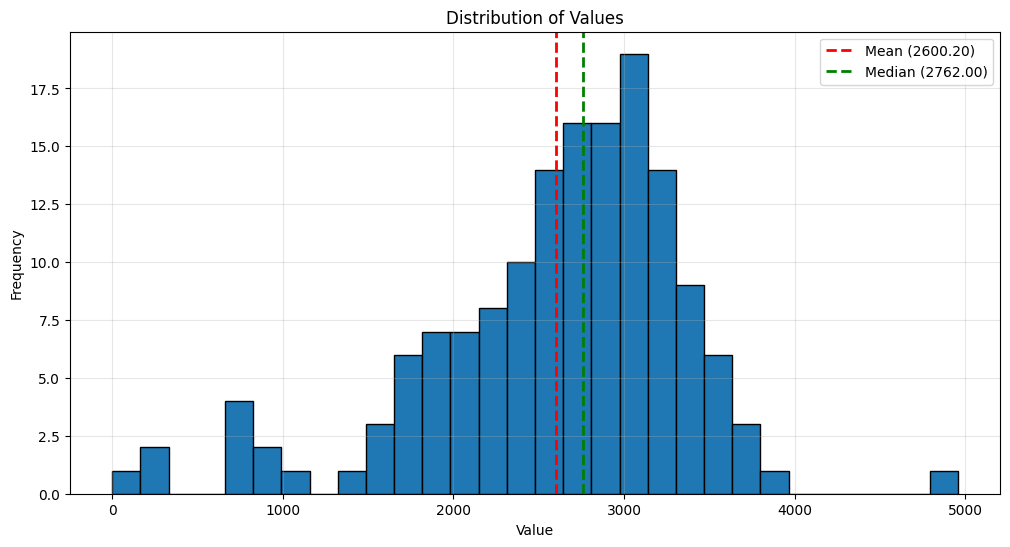

Number of values: 151
Minimum value: 0
Maximum value: 4956
Mean: 2600.20
Median: 2762.00
Standard deviation: 771.63


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# The values from your dict_values
values = [814, 4956, 1509, 3700, 3029, 2575, 2261, 3077, 2474, 2429, 3059, 2073, 2584, 2485, 2935, 2883, 2221, 2593, 1981, 3771, 2675, 2889, 2716, 2881, 2510, 3001, 3075, 2527, 2546, 2788, 3078, 2762, 2877, 3194, 3137, 1504, 705, 1727, 2350, 3425, 2651, 3295, 3172, 2464, 2877, 2839, 2691, 2285, 3307, 2710, 698, 1861, 1904, 2286, 2574, 2822, 2766, 3123, 2891, 2466, 2762, 3123, 3076, 2379, 2091, 3010, 2484, 2705, 2669, 2825, 2248, 2025, 1663, 2739, 1712, 2418, 2784, 3215, 3217, 3204, 3121, 1856, 901, 1937, 2057, 2189, 1711, 1932, 2160, 2061, 2062, 1663, 190, 3183, 1820, 3275, 2341, 3166, 1022, 2961, 3097, 3062, 2957, 2768, 947, 2852, 3488, 2337, 1402, 2598, 1808, 2917, 2486, 3441, 2748, 3088, 2609, 2882, 3496, 3050, 3517, 3306, 1644, 2032, 3102, 2798, 3288, 2992, 3453, 3166, 3364, 2359, 668, 2500, 280, 3149, 3438, 3321, 3104, 2897, 3259, 2152, 3565, 3577, 3866, 3452, 3748, 3158, 3532, 2495, 0]

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(values, bins=30, edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add mean and median lines
mean_value = np.mean(values)
median_value = np.median(values)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean ({mean_value:.2f})')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median ({median_value:.2f})')

plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

# Print some basic statistics
print(f"Number of values: {len(values)}")
print(f"Minimum value: {min(values)}")
print(f"Maximum value: {max(values)}")
print(f"Mean: {mean_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Standard deviation: {np.std(values):.2f}")

In [33]:
embed_model=OpenAIEmbedding(model_name="text-embedding-3-small",api_key=openai_api_key)
llm=OpenAI(model="gpt-3.5-turbo", temperature=0.0,api_key=openai_api_key)

In [34]:
graph_store = Neo4jPropertyGraphStore(
    username="neo4j",
    password=userdata.get('neo4j_password'),
    url=userdata.get('neo4j_url')
)

In [35]:
index = PropertyGraphIndex.from_documents(
    documents,
    embed_model=embed_model,
    kg_extractors=[
        SimpleLLMPathExtractor(
            llm=llm
        )
    ],
    property_graph_store=graph_store,
    show_progress=True,
)

Parsing nodes:   0%|          | 0/151 [00:00<?, ?it/s]

Generating embeddings: 100%|██████████| 28/28 [00:02<00:00, 12.33it/s]


In [36]:
# load from existing graph/vector store
index = PropertyGraphIndex.from_existing(
    property_graph_store=graph_store,
    embed_kg_nodes=True,
    llm=OpenAI(model="gpt-3.5-turbo", temperature=0.0,api_key=openai_api_key),
)

In [37]:
llm_synonym = LLMSynonymRetriever(
    index.property_graph_store,
    llm=OpenAI(model="gpt-3.5-turbo", temperature=0.0,api_key=openai_api_key),
    include_text=True,
)
vector_context = VectorContextRetriever(
    index.property_graph_store,
    embed_model=embed_model,
    include_text=True,
)

In [40]:
retriever = index.as_retriever(
    sub_retrievers=[
        llm_synonym,
        vector_context,
    ],
    include_text=False
)

nodes = retriever.retrieve("compliance criteria?")

for node in nodes:
    print(node.text)

Here are some facts extracted from the provided text:

Doee -> Streamlines -> Compliance requirements

2023 DHCD Consolidated Request for Proposals  15 •DC Green Bank : Provides reduced -interest construction and permanent
loans for clean energy, energy and resource efficiency, and resilience
improvements for either new construction or preservation projects.
•HUD’s Green and Resilient Retrofit Program (GRRP) : Up to $4.8 billion is
available from HUD to fund energy efficiency and resilience measures inaffordable housing projects assisted under the Section 8 Project- Based
Rental Assistance (PBRA) program, including properties that converted
under the RAD Program prior to September 30, 2021; the Section 202Housing for the Elderly program; the Section 811 Housing for Persons withDisabilities program; or the Section 236 program.
The 
first Notice of Funding Opportunity (NOFO) for the Elements path or
cohort for projects that are materially advanced in a recapitalizationtransaction is now 

In [41]:
query_engine = index.as_query_engine(sub_retrievers=[
        llm_synonym,
        vector_context,
    ],include_text=True)

response = query_engine.query("What is compliance criteria for a solar related project? Explain in detail")

print(f"{response.response}")

Projects must maintain net zero energy compliance, which means they need to be designed and constructed to accommodate individuals with mobility impairments. Additionally, projects may receive points if they provide twice the number of accessible and audio/visual units as required by Section 504. This ensures that a percentage of units are accessible or that all building units are adaptable. Compliance also involves adhering to any additional local compliance requirements that may apply to LIHTC projects, as outlined in the Compliance and Monitoring Reference Guide. Failure to comply with these requirements may result in the issuance of IRS Form(s) 8823 and potential recapture of tax credits. Project owners are required to maintain records for each year of the Compliance Period and must notify DHCD of any proposed changes in property management or ownership at least 30 days prior. If a project is found to be in noncompliance, the owner will be notified in writing and given a cure perio